In [262]:
import pandas as pd
from sklearn.metrics import mean_squared_error

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import missingno as msno
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OrdinalEncoder
from warnings import filterwarnings

In [263]:
titanic_trn = pd.read_csv('train.csv')
titanic_trn

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [264]:
print(titanic_trn.shape)

(891, 11)


In [265]:
print(titanic_trn.head())

   survived  pclass                                               name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      sex   age  sibsp  parch            ticket     fare cabin embarked  
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S  
1  female  38.0      1      0          PC 17599  71.2833   C85        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3  female  35.0      1      0            113803  53.1000  C123        S  
4    male  35.0      0      0            373450   8.0500   NaN        S  


In [266]:
print(titanic_trn.describe())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [267]:
titanic_trn.describe(include = "all")

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Text(0.5, 1.0, 'Survived')

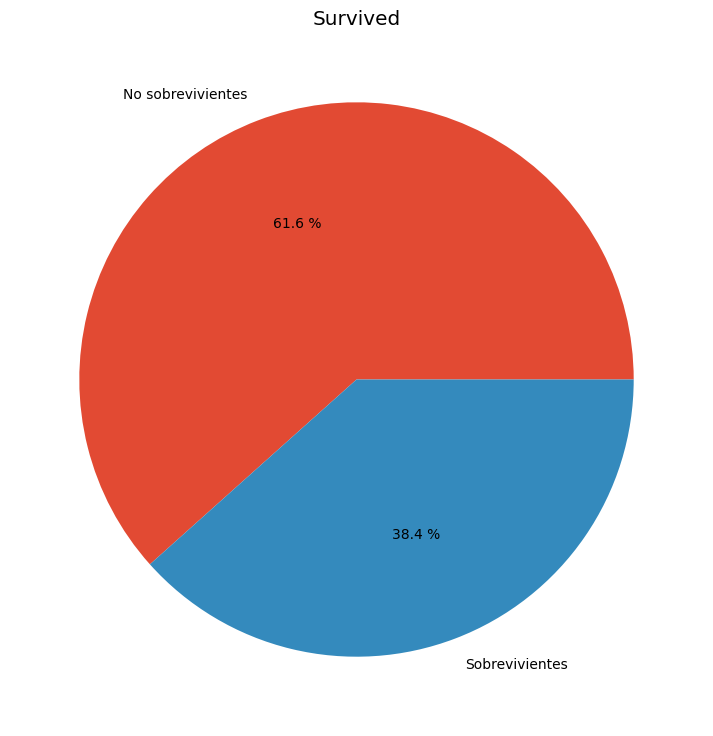

In [268]:
plt.pie(titanic_trn.survived.value_counts(),labels=['No sobrevivientes', 'Sobrevivientes'], autopct="%0.1f %%")
plt.title('Survived')

In [269]:
titanic_trn.groupby('pclass').size()

pclass
1    216
2    184
3    491
dtype: int64

In [270]:
titanic_trn.groupby(['survived', 'sex']).size()

survived  sex   
0         female     81
          male      468
1         female    233
          male      109
dtype: int64

In [271]:
titanic_trn['survived'].groupby(titanic_trn['sex']).mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [272]:
titanic_trn.groupby('cabin').size()

cabin
A10    1
A14    1
A16    1
A19    1
A20    1
      ..
F33    3
F38    1
F4     2
G6     4
T      1
Length: 147, dtype: int64

In [273]:
titanic_trn.groupby(['survived', 'pclass']).size()

survived  pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
dtype: int64

In [274]:
titanic_trn.groupby(['survived', 'embarked']).size()

survived  embarked
0         C            75
          Q            47
          S           427
1         C            93
          Q            30
          S           217
dtype: int64

In [275]:
titanic_trn['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [276]:
pd.isna(titanic_trn['age'])

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: age, Length: 891, dtype: bool

In [277]:
columnas_numeros = titanic_trn.select_dtypes(include=['float64', 'int64'])
x = columnas_numeros.corr(method='pearson')
print (x)

          survived    pclass       age     sibsp     parch      fare
survived  1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307
pclass   -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500
age      -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067
sibsp    -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651
parch     0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225
fare      0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000


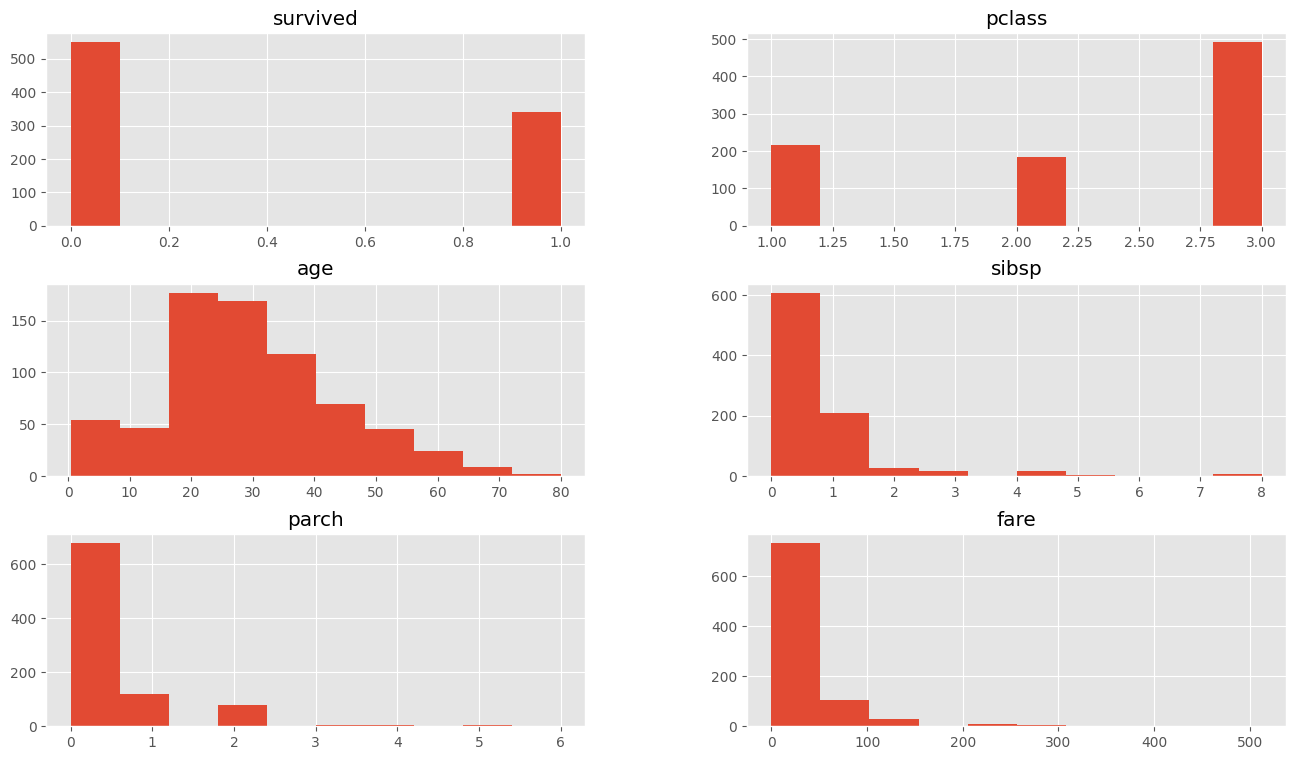

In [278]:
titanic_trn.hist()
plt.show()

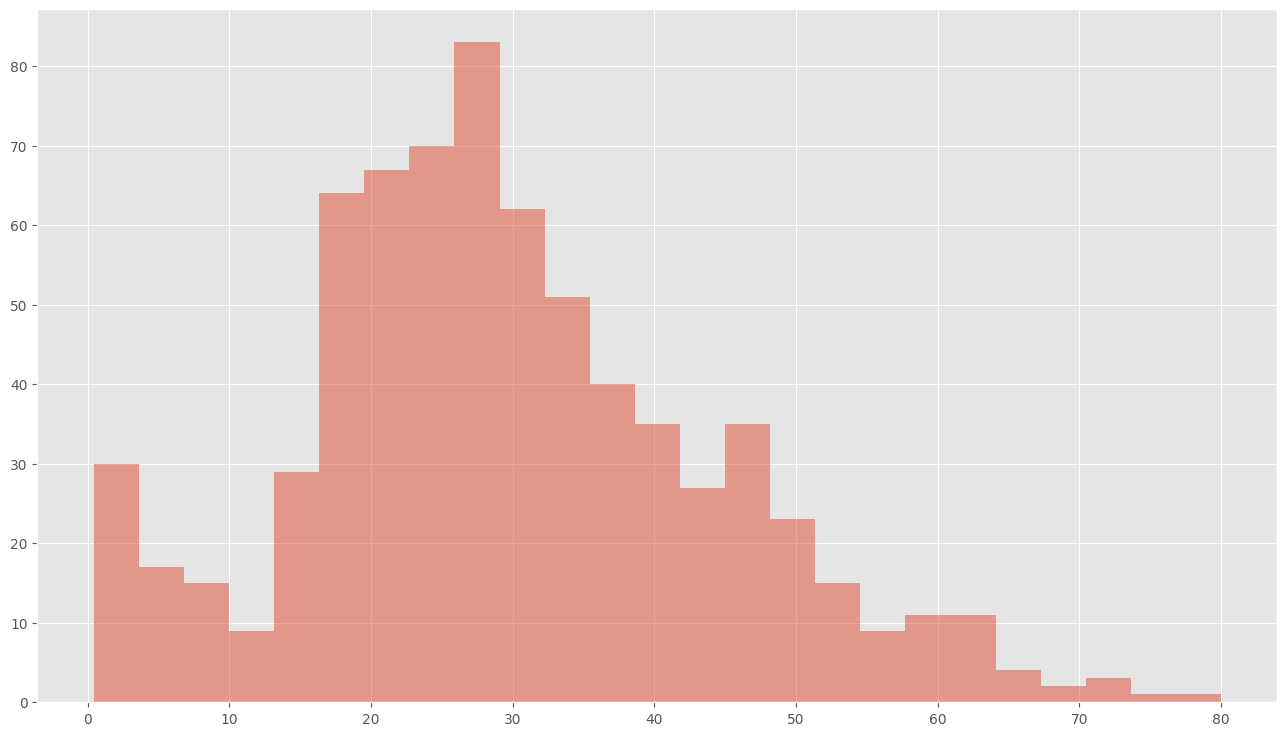

In [279]:
grafico_age=titanic_trn['age'].hist(alpha=0.5,bins=25)

Se observa que la mayor cantidad de pasajeros tenian entre 27-29 años, también se observa que hay mas niños que personas adultas.

In [280]:
supervivientes = titanic_trn[titanic_trn['survived'] == 1]
media_edad = supervivientes['age'].mean()
print(media_edad)

28.343689655172415


In [281]:

asimetria = columnas_numeros.skew()
asimetria

survived    0.478523
pclass     -0.630548
age         0.389108
sibsp       3.695352
parch       2.749117
fare        4.787317
dtype: float64

Si el valor resultante para la asimetría está por encima de +1 o por debajo de -1, los datos están muy sesgados. Si está entre +0.5 y -0.5, están sesgados moderadamente. Si el valor es 0, entonces los datos son simétricos.

In [282]:
round((titanic_trn.isna().sum()/ len(titanic_trn))*100,2)

survived     0.00
pclass       0.00
name         0.00
sex          0.00
age         19.87
sibsp        0.00
parch        0.00
ticket       0.00
fare         0.00
cabin       77.10
embarked     0.22
dtype: float64

El porcentaje de supervivientes es aproximadamente 38%. Al explorar la relación entre la supervivencia y la clase de pasajero, se nota que la mayoría de los supervivientes eran de primera clase, seguidos por la tercera clase y, finalmente, la segunda clase. Sin embargo, al ajustar estos números en función del tamaño de cada clase, se destaca que el 63% de los pasajeros de primera clase lograron sobrevivir, en comparación con el 47% de la segunda clase y el 24% de la tercera clase. La mayoría de los supervivientes embarcaron desde el puerto de Southampton, que también registró la mayor cantidad de víctimas. Además, observamos que una proporción significativa de los pasajeros que sobrevivieron no tenía hijos a bordo. En cuanto a la distribución de género entre los supervivientes, las mujeres predominan. Y la edad promedio es de aproximadamente 28 años.

# Depuración de los datos

<Axes: >

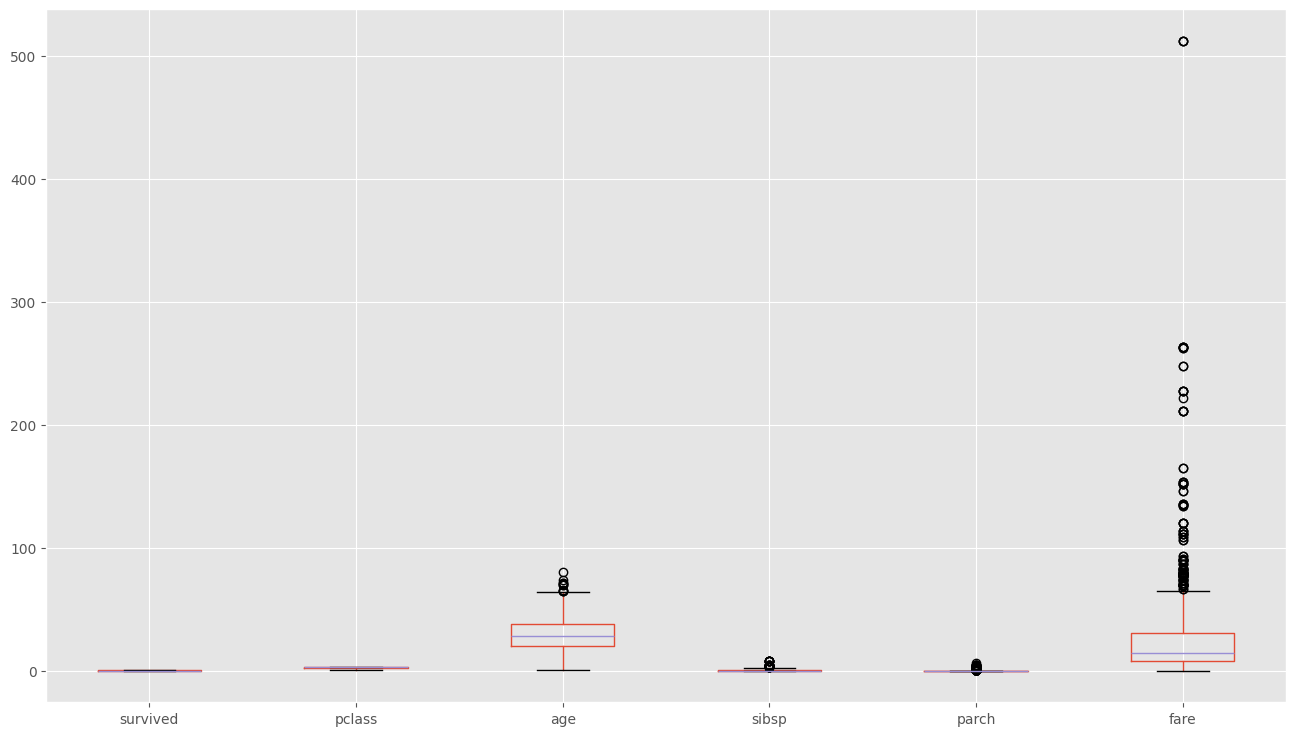

In [283]:
titanic_trn.boxplot()

In [284]:
# Cálculo rango intercuartílico
Q1 = titanic_trn['fare'].quantile(0.25)
Q3 = titanic_trn['fare'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

23.0896


In [285]:
iqr_values = columnas_numeros.apply(lambda x: x.quantile(0.75) - x.quantile(0.25))
iqr_values

survived     1.0000
pclass       1.0000
age         17.8750
sibsp        1.0000
parch        0.0000
fare        23.0896
dtype: float64

In [286]:
columnas_numeros.shape
titanicTrn_out = columnas_numeros[~((columnas_numeros < (Q1 - 1.5 * IQR)) |(columnas_numeros > (Q3 + 1.5 * IQR))).any(axis=1)]
titanicTrn_out.shape
print(titanicTrn_out)

     survived  pclass   age  sibsp  parch     fare
0           0       3  22.0      1      0   7.2500
2           1       3  26.0      0      0   7.9250
3           1       1  35.0      1      0  53.1000
4           0       3  35.0      0      0   8.0500
5           0       3   NaN      0      0   8.4583
..        ...     ...   ...    ...    ...      ...
886         0       2  27.0      0      0  13.0000
887         1       1  19.0      0      0  30.0000
888         0       3   NaN      1      2  23.4500
889         1       1  26.0      0      0  30.0000
890         0       3  32.0      0      0   7.7500

[768 rows x 6 columns]


<Axes: >

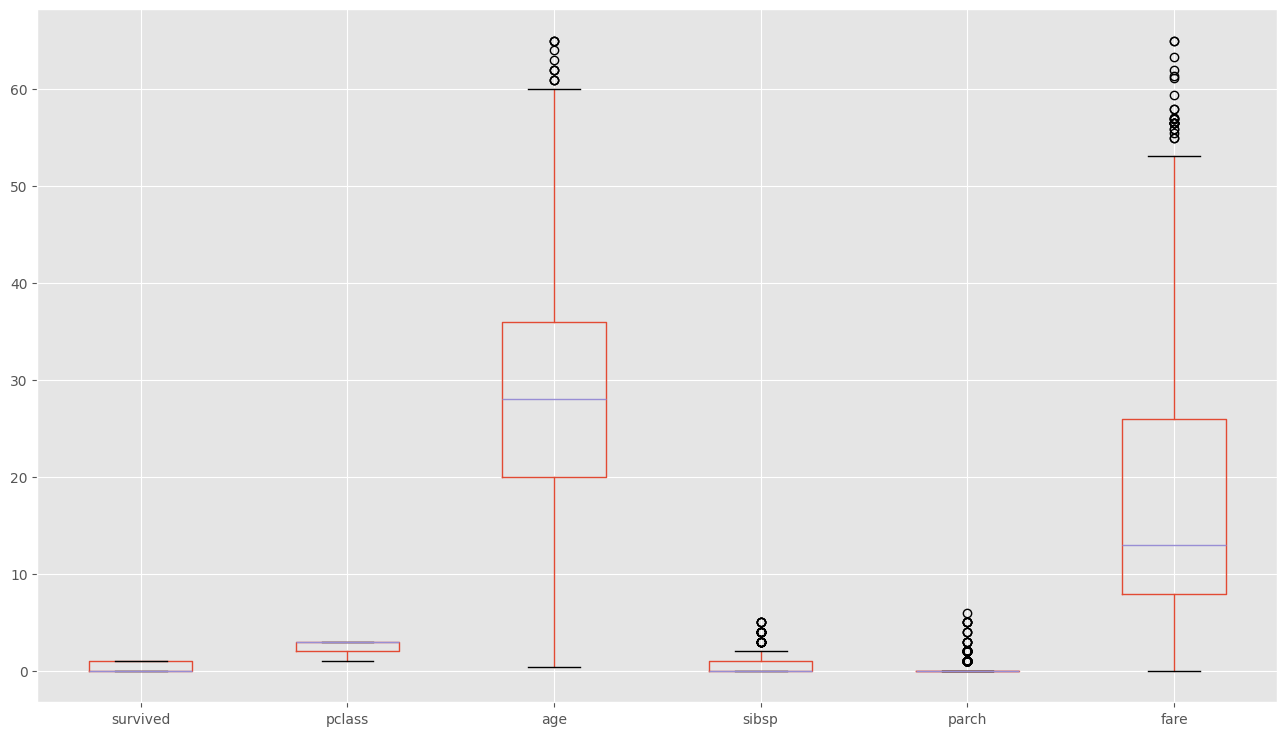

In [287]:
titanicTrn_out.boxplot()

In [288]:
titanic_trn.describe().loc['count']

survived    891.0
pclass      891.0
age         714.0
sibsp       891.0
parch       891.0
fare        891.0
Name: count, dtype: float64

In [289]:
titanic_trn.count()

survived    891
pclass      891
name        891
sex         891
age         714
sibsp       891
parch       891
ticket      891
fare        891
cabin       204
embarked    889
dtype: int64

In [290]:
titanic_trn.isnull().sum()

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

In [291]:
titanic_trn[titanic_trn['age'].isnull()]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


<Axes: >

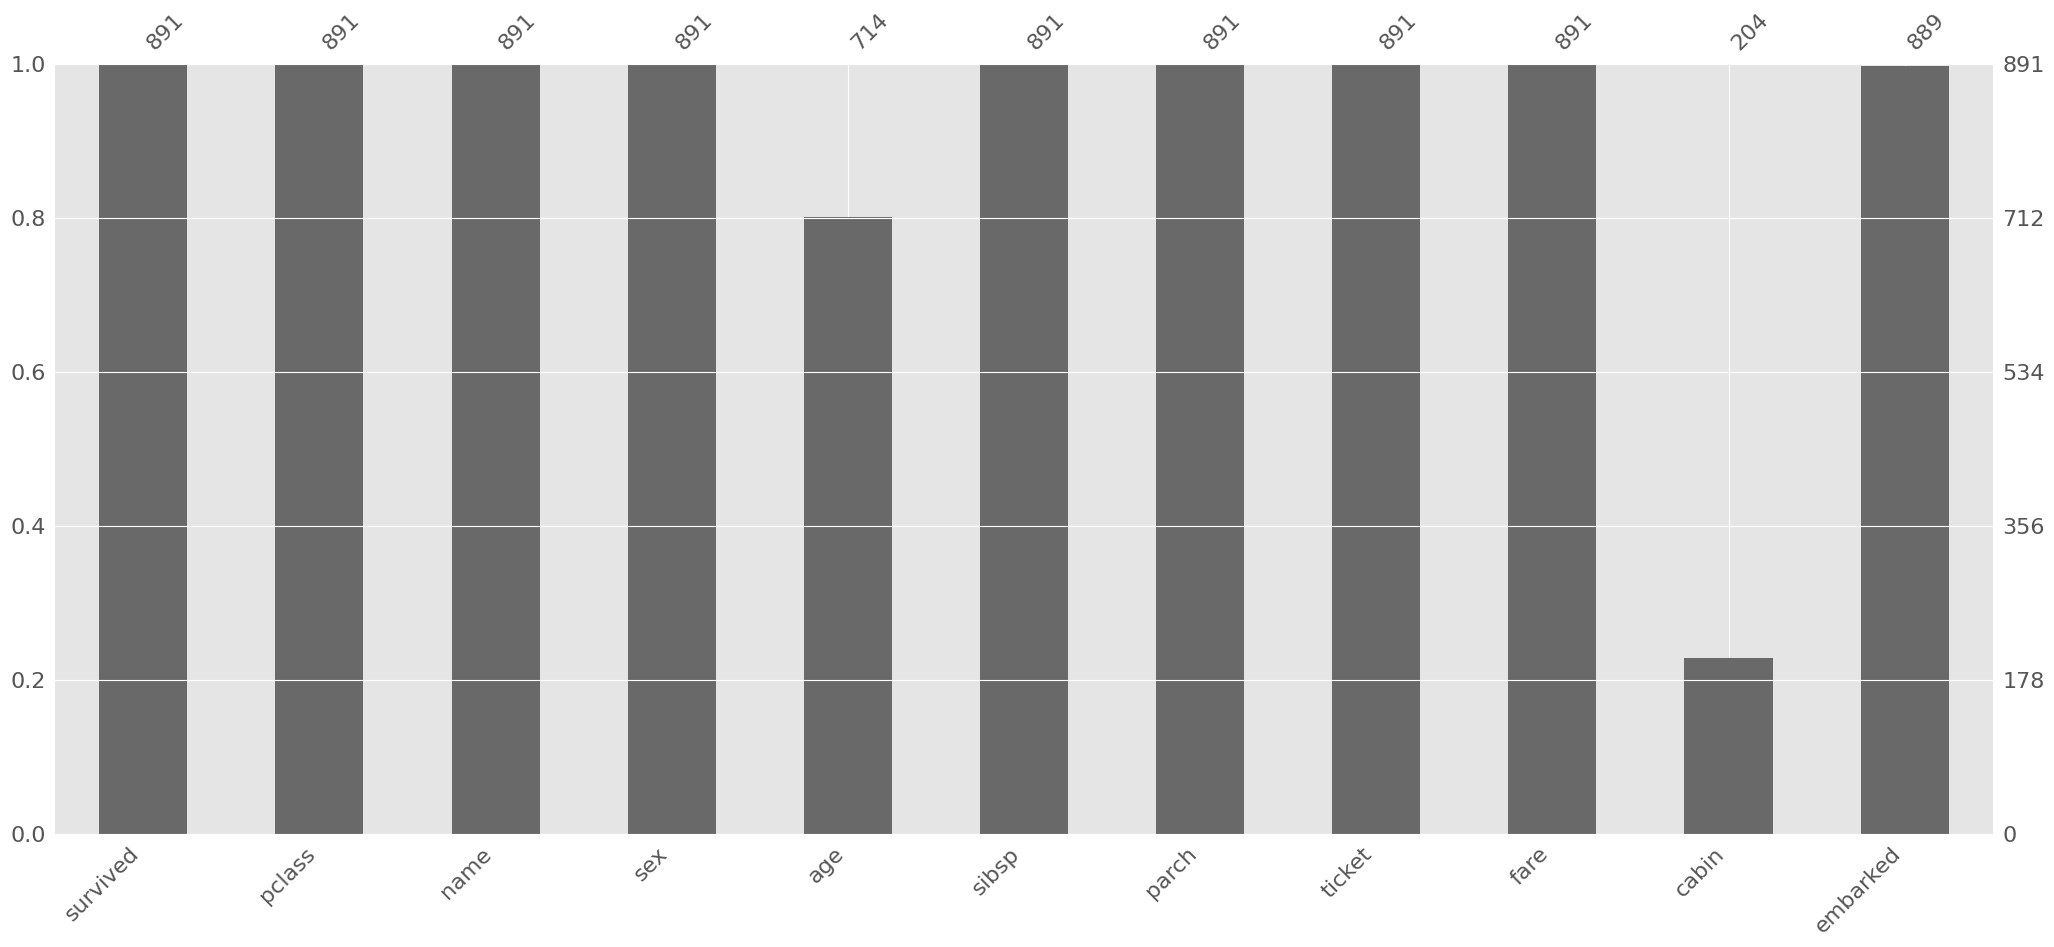

In [292]:
msno.bar(titanic_trn)

In [293]:
titanic_trn.sort_values("cabin", ascending = True, na_position ='last')

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
583,0,1,"Ross, Mr. John Hugo",male,36.0,0,0,13049,40.1250,A10,C
475,0,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0000,A14,S
556,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.6000,A16,C
284,0,1,"Smith, Mr. Richard William",male,NaN,0,0,113056,26.0000,A19,S
599,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,PC 17485,56.9292,A20,C
...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [294]:
cabin_ord=titanic_trn['cabin'].isnull()
titanic_trn[cabin_ord]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [295]:
print(titanic_trn.loc[:,'embarked'].value_counts())

S    644
C    168
Q     77
Name: embarked, dtype: int64


In [296]:
titanic_trn[titanic_trn['embarked'].isnull()]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [297]:
titanic_trn[(titanic_trn['pclass']) == 1]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [298]:
no_cabina = titanic_trn[(titanic_trn['pclass'] == 3) & titanic_trn['cabin'].isnull()]
cantidad = len(no_cabina)
print(no_cabina,f'\n Existe una cantidad de {cantidad} pasajeros sin cabina')

     survived  pclass                                      name     sex   age  \
0           0       3                   Braund, Mr. Owen Harris    male  22.0   
2           1       3                    Heikkinen, Miss. Laina  female  26.0   
4           0       3                  Allen, Mr. William Henry    male  35.0   
5           0       3                          Moran, Mr. James    male   NaN   
7           0       3            Palsson, Master. Gosta Leonard    male   2.0   
..        ...     ...                                       ...     ...   ...   
882         0       3              Dahlberg, Miss. Gerda Ulrika  female  22.0   
884         0       3                    Sutehall, Mr. Henry Jr    male  25.0   
885         0       3      Rice, Mrs. William (Margaret Norton)  female  39.0   
888         0       3  Johnston, Miss. Catherine Helen "Carrie"  female   NaN   
890         0       3                       Dooley, Mr. Patrick    male  32.0   

     sibsp  parch          

In [299]:
dato = titanic_trn[(titanic_trn['pclass']) == 1]
cant = len(dato)
print (cant,'\n', dato.head(5))

216 
     survived  pclass                                               name  \
1          1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
3          1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
6          0       1                            McCarthy, Mr. Timothy J   
11         1       1                           Bonnell, Miss. Elizabeth   
23         1       1                       Sloper, Mr. William Thompson   

       sex   age  sibsp  parch    ticket     fare cabin embarked  
1   female  38.0      1      0  PC 17599  71.2833   C85        C  
3   female  35.0      1      0    113803  53.1000  C123        S  
6     male  54.0      0      0     17463  51.8625   E46        S  
11  female  58.0      0      0    113783  26.5500  C103        S  
23    male  28.0      0      0    113788  35.5000    A6        S  


In [300]:
variables_eliminar =['name', 'ticket','cabin']
titanic_trn = titanic_trn.drop(variables_eliminar, axis=1)
titanic_trn.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


In [301]:
titanicTrn_imp=titanic_trn.copy()
titanicTrn_imp

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [302]:
titanic_trn.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
dtype: int64

In [303]:
# Para variables cuantitativas reemplazar con la media
titanic_trn['age'].fillna(titanic_trn['age'].mean(),inplace=True)


In [304]:
# Para variables categóricas se puede imputar con el valor más frecuente (Moda)
titanic_trn['embarked'].fillna(titanic_trn['embarked'].mode()[0],inplace=True)


In [305]:
titanic_trn.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

<Axes: >

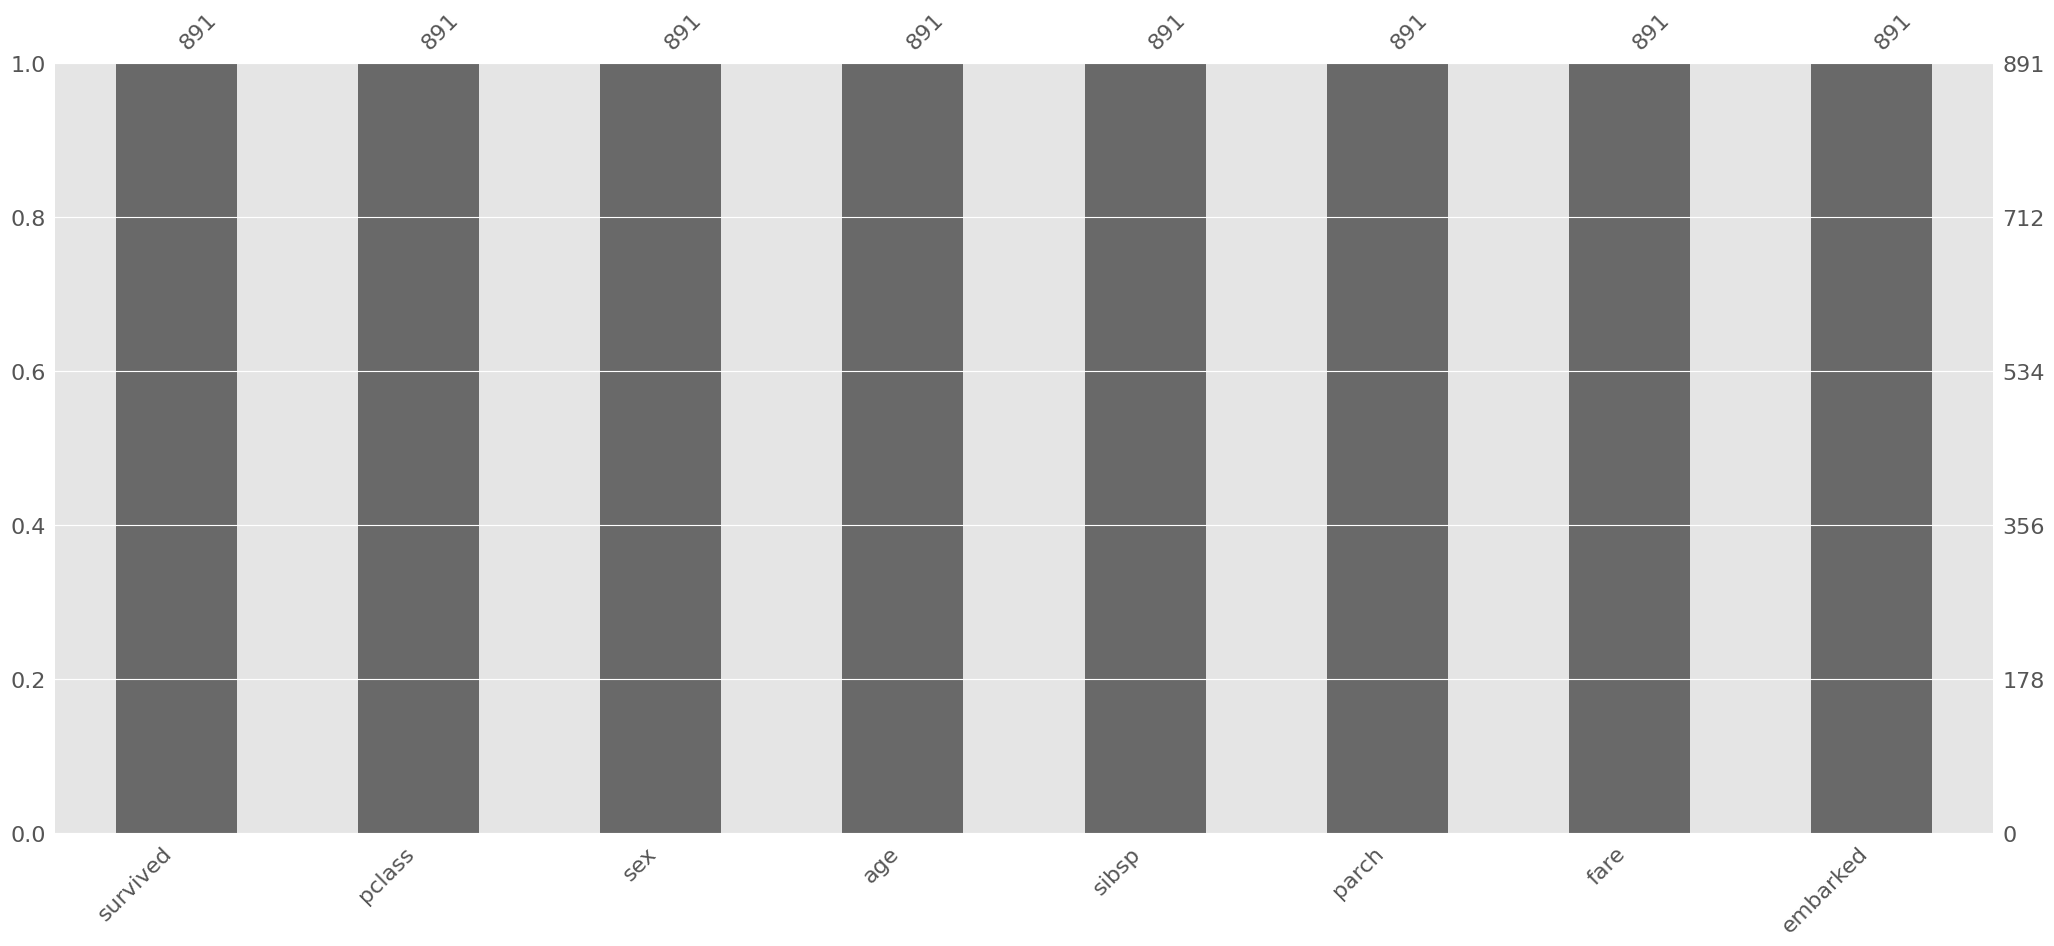

In [306]:
msno.bar(titanic_trn)

In [307]:
titanicTrn_imp.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
dtype: int64

In [308]:
# Imputación datos perdidos al valor del vecino más cercano por interpolación
titanicTrn_imp['age'] = titanicTrn_imp['age'].interpolate(method='nearest')

In [309]:
titanicTrn_imp['embarked'].fillna(titanicTrn_imp['embarked'].mode()[0],inplace=True)

In [310]:
titanicTrn_imp.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

# Transformación de los datos

**Normalización**:


$$X_{norm} = \frac {X - X_{min}} {X_{max} - X_{min}}$$


**Estandarización**: 


$$X_{estd} = \frac{X - \mu} {\sigma}$$

In [311]:
# Normalización 
titanic_trn.age=(titanic_trn.age-min(titanic_trn.age))/(max(titanic_trn.age)-min(titanic_trn.age))
titanic_trn.fare=(titanic_trn.fare-min(titanic_trn.fare))/(max(titanic_trn.fare)-min(titanic_trn.fare))
titanic_trn.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,0.271174,1,0,0.014151,S
1,1,1,female,0.472229,1,0,0.139136,C
2,1,3,female,0.321438,0,0,0.015469,S
3,1,1,female,0.434531,1,0,0.103644,S
4,0,3,male,0.434531,0,0,0.015713,S


In [312]:
titanicTrn_imp.age=(titanicTrn_imp.age-min(titanicTrn_imp.age))/(max(titanicTrn_imp.age)-min(titanicTrn_imp.age))
titanicTrn_imp.fare=(titanicTrn_imp.fare-min(titanicTrn_imp.fare))/(max(titanicTrn_imp.fare)-min(titanicTrn_imp.fare))
titanicTrn_imp.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,0.271174,1,0,0.014151,S
1,1,1,female,0.472229,1,0,0.139136,C
2,1,3,female,0.321438,0,0,0.015469,S
3,1,1,female,0.434531,1,0,0.103644,S
4,0,3,male,0.434531,0,0,0.015713,S


In [313]:
# Crear variables ficticias (dummy) para la columna sex
titanicTrn_imp =  pd.get_dummies(titanicTrn_imp, columns=['sex'], drop_first=True)

In [314]:
titanicTrn_imp = pd.get_dummies(titanicTrn_imp, columns=['embarked'], drop_first=True)

In [315]:
titanicTrn_imp.head(10)

,survived,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,0,3,0.271174,1,0,0.014151,1,0,1
1,1,1,0.472229,1,0,0.139136,0,0,0
2,1,3,0.321438,0,0,0.015469,0,0,1
3,1,1,0.434531,1,0,0.103644,0,0,1
4,0,3,0.434531,0,0,0.015713,1,0,1
5,0,3,0.434531,0,0,0.016510,1,1,0
6,0,1,0.673285,0,0,0.101229,1,0,1
7,0,3,0.019854,3,1,0.041136,1,0,1
8,1,3,0.334004,0,2,0.021731,0,0,1
9,1,2,0.170646,1,0,0.058694,0,0,0


In [316]:
encoder = OrdinalEncoder(categories=[['male', 'female']])
titanic_trn[['sex']] = encoder.fit_transform(titanic_trn[['sex']])

In [317]:
encoder = OrdinalEncoder(categories=[['S','C','Q']])
titanic_trn[['embarked']] = encoder.fit_transform(titanic_trn[['embarked']])

In [318]:
titanic_trn.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,0.0,0.271174,1,0,0.014151,0.0
1,1,1,1.0,0.472229,1,0,0.139136,1.0
2,1,3,1.0,0.321438,0,0,0.015469,0.0
3,1,1,1.0,0.434531,1,0,0.103644,0.0
4,0,3,0.0,0.434531,0,0,0.015713,0.0


In [319]:
titanicTrn_imp.head()

,survived,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,0,3,0.271174,1,0,0.014151,1,0,1
1,1,1,0.472229,1,0,0.139136,0,0,0
2,1,3,0.321438,0,0,0.015469,0,0,1
3,1,1,0.434531,1,0,0.103644,0,0,1
4,0,3,0.434531,0,0,0.015713,1,0,1


,survived
survived,1.000000
sex,0.543351
fare,0.257307
embarked,0.106811
parch,0.081629
sibsp,-0.035322
age,-0.069809
pclass,-0.338481


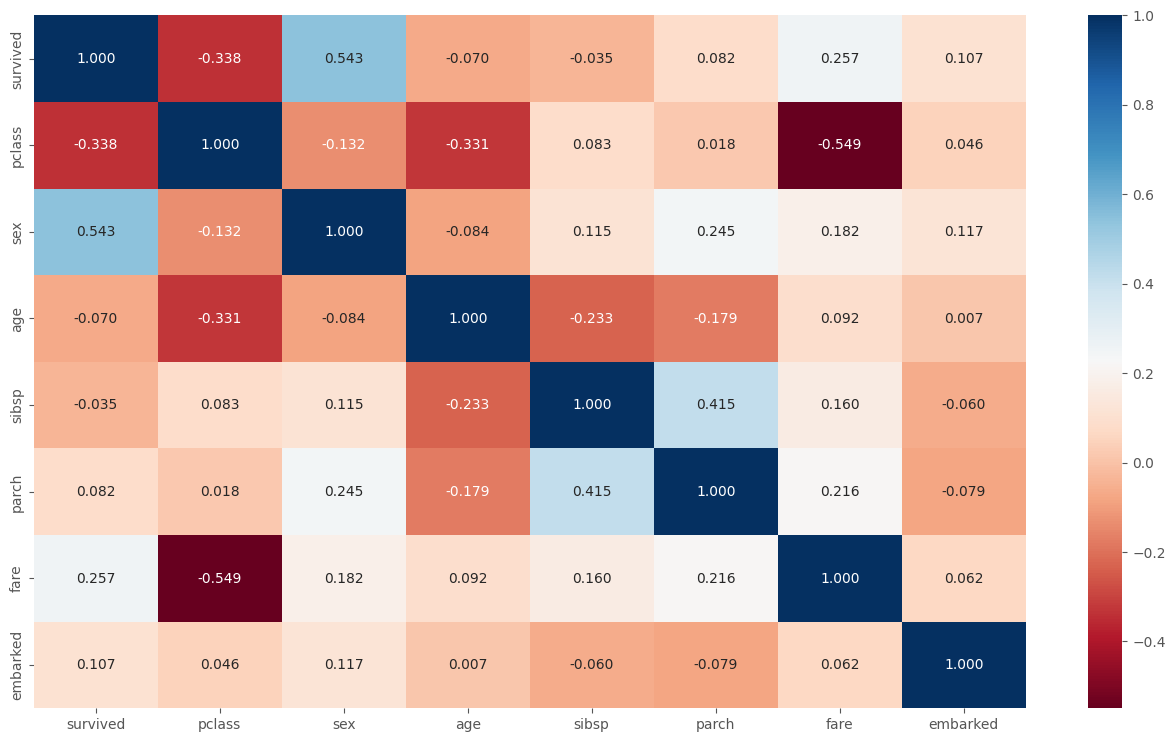

In [320]:
corr = titanic_trn.corr()
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".3f")
corr[['survived']].sort_values(by = 'survived',ascending = False)

In [321]:
variables_eliminar2 = ['sibsp'	,'parch']               
titanic_trn = titanic_trn.drop(variables_eliminar2, axis=1)
titanicTrn_imp = titanicTrn_imp.drop(variables_eliminar2, axis=1)

In [322]:
titanicTrn_imp.head(3)

,survived,pclass,age,fare,sex_male,embarked_Q,embarked_S
0,0,3,0.271174,0.014151,1,0,1
1,1,1,0.472229,0.139136,0,0,0
2,1,3,0.321438,0.015469,0,0,1


In [323]:
titanic_trn.head(3)

,survived,pclass,sex,age,fare,embarked
0,0,3,0.0,0.271174,0.014151,0.0
1,1,1,1.0,0.472229,0.139136,1.0
2,1,3,1.0,0.321438,0.015469,0.0


# Conjunto test

In [324]:
titanic_tst = pd.read_csv('test.csv')
titanic_tst

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Exploración de los datos

In [325]:
print(titanic_tst.shape)

(418, 10)


In [326]:
titanic_tst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    418 non-null    int64  
 1   name      418 non-null    object 
 2   sex       418 non-null    object 
 3   age       332 non-null    float64
 4   sibsp     418 non-null    int64  
 5   parch     418 non-null    int64  
 6   ticket    418 non-null    object 
 7   fare      417 non-null    float64
 8   cabin     91 non-null     object 
 9   embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 32.8+ KB


In [327]:
print(titanic_tst.describe())

           pclass         age       sibsp       parch        fare
count  418.000000  332.000000  418.000000  418.000000  417.000000
mean     2.265550   30.272590    0.447368    0.392344   35.627188
std      0.841838   14.181209    0.896760    0.981429   55.907576
min      1.000000    0.170000    0.000000    0.000000    0.000000
25%      1.000000   21.000000    0.000000    0.000000    7.895800
50%      3.000000   27.000000    0.000000    0.000000   14.454200
75%      3.000000   39.000000    1.000000    0.000000   31.500000
max      3.000000   76.000000    8.000000    9.000000  512.329200


In [328]:
titanic_tst.groupby('pclass').size()

pclass
1    107
2     93
3    218
dtype: int64

In [329]:
columnas_numeros_t = titanic_tst.select_dtypes(include=['float64', 'int64'])
y = columnas_numeros_t.corr(method='pearson')
print (y)

          pclass       age     sibsp     parch      fare
pclass  1.000000 -0.492143  0.001087  0.018721 -0.577147
age    -0.492143  1.000000 -0.091587 -0.061249  0.337932
sibsp   0.001087 -0.091587  1.000000  0.306895  0.171539
parch   0.018721 -0.061249  0.306895  1.000000  0.230046
fare   -0.577147  0.337932  0.171539  0.230046  1.000000


In [330]:
asimetria_t = columnas_numeros_t.skew()
asimetria_t

pclass   -0.534170
age       0.457361
sibsp     4.168337
parch     4.654462
fare      3.687213
dtype: float64

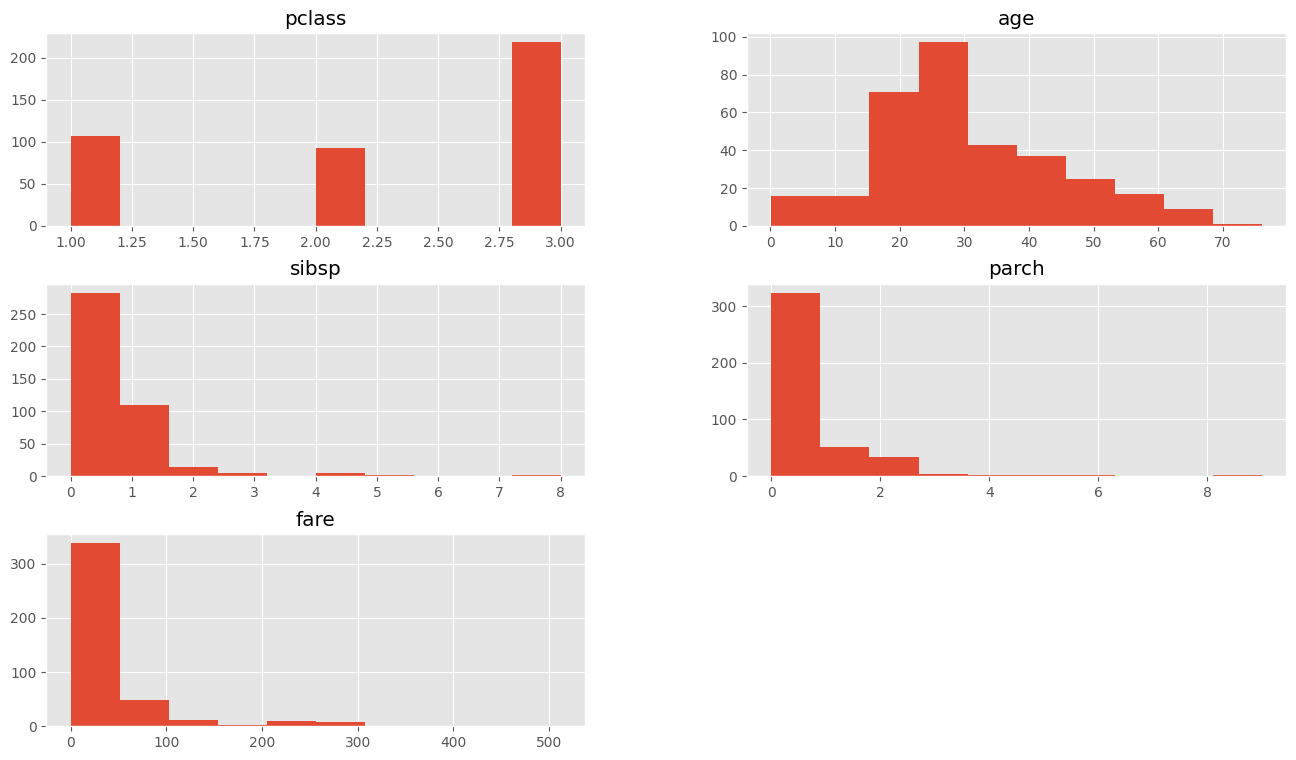

In [331]:
titanic_tst.hist()
plt.show()

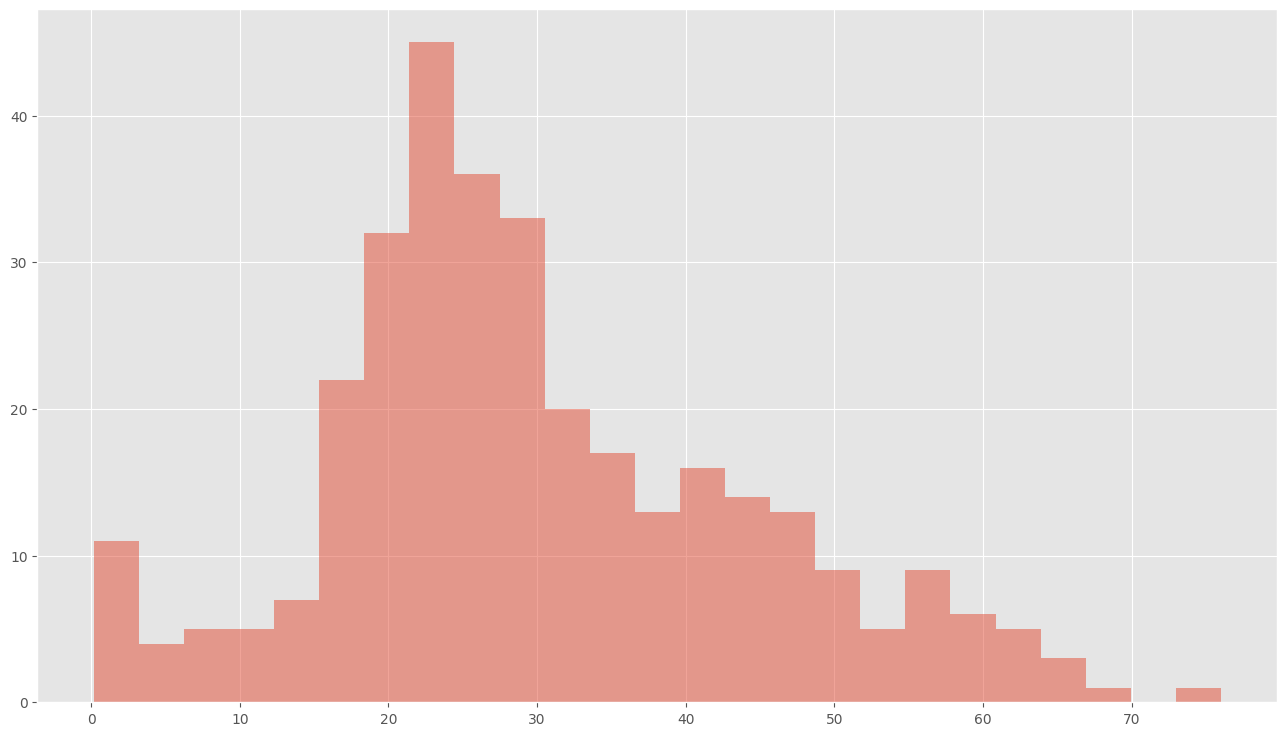

In [332]:
grafico_age=titanic_tst['age'].hist(alpha=0.5,bins=25)

## Depuración de los datos

<Axes: >

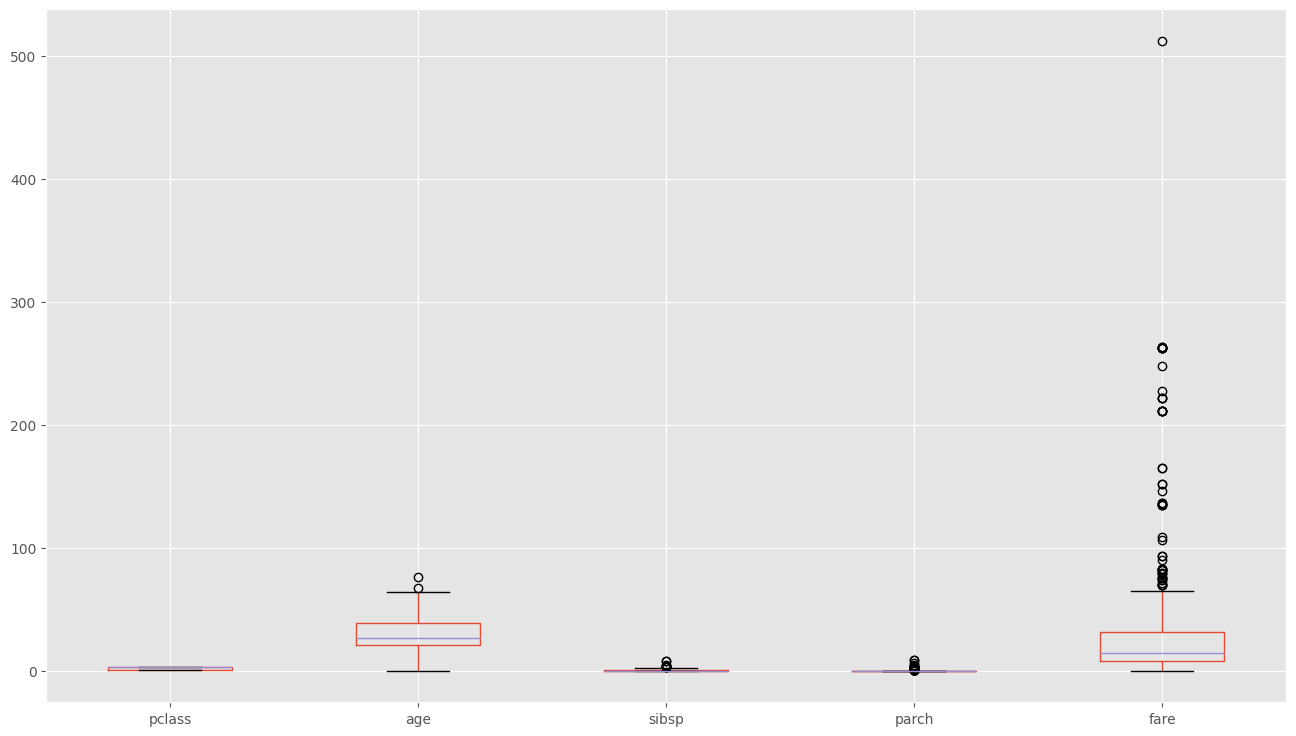

In [333]:
titanic_tst.boxplot()

In [334]:
Q1 = titanic_tst['fare'].quantile(0.25)
Q3 = titanic_tst['fare'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

23.6042


In [335]:
iqr_values_t = columnas_numeros_t.apply(lambda x: x.quantile(0.75) - x.quantile(0.25))
iqr_values_t

pclass     2.0000
age       18.0000
sibsp      1.0000
parch      0.0000
fare      23.6042
dtype: float64

In [336]:
columnas_numeros_t.shape
titanicTrn_out_t = columnas_numeros_t[~((columnas_numeros_t < (Q1 - 1.5 * IQR)) |(columnas_numeros_t > (Q3 + 1.5 * IQR))).any(axis=1)]
titanicTrn_out_t.shape
print(titanicTrn_out_t)

     pclass   age  sibsp  parch     fare
0         3  34.5      0      0   7.8292
1         3  47.0      1      0   7.0000
2         2  62.0      0      0   9.6875
3         3  27.0      0      0   8.6625
4         3  22.0      1      1  12.2875
..      ...   ...    ...    ...      ...
412       3  28.0      0      0   7.7750
413       3   NaN      0      0   8.0500
415       3  38.5      0      0   7.2500
416       3   NaN      0      0   8.0500
417       3   NaN      1      1  22.3583

[363 rows x 5 columns]


<Axes: >

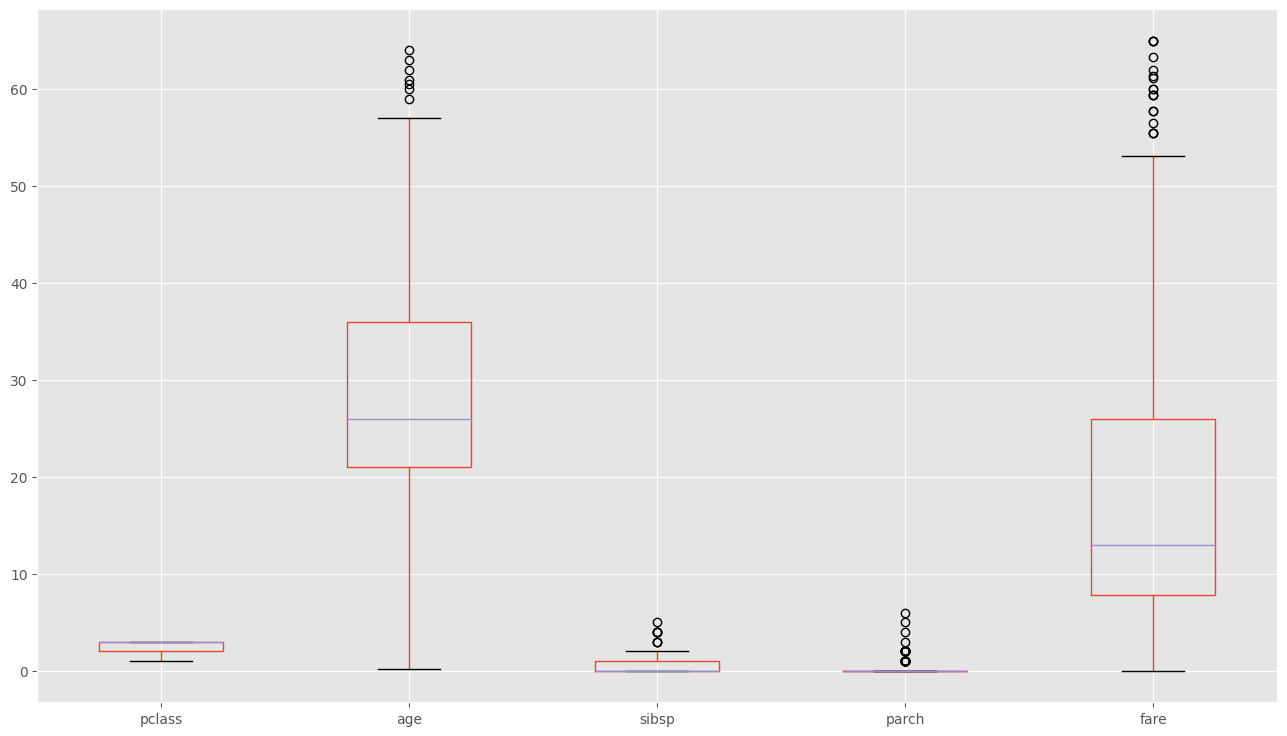

In [337]:
titanicTrn_out_t.boxplot()

In [338]:
titanic_tst.head(5)

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [339]:
variables_eliminar_t =['name', 'ticket','cabin']
titanic_tst = titanic_tst.drop(variables_eliminar_t, axis=1)
titanic_tst.head(3)

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q


In [340]:
titanic_tst.isnull().sum()

pclass       0
sex          0
age         86
sibsp        0
parch        0
fare         1
embarked     0
dtype: int64

In [341]:
titanic_tst['age'].fillna(titanic_tst['age'].mean(),inplace=True)

In [342]:
titanic_tst['fare'].fillna(titanic_tst['fare'].mean(),inplace=True)

In [343]:
titanic_tst.isnull().sum()

pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

## Transformación de los datos

In [344]:
titanictst_imp=titanic_tst.copy()

In [345]:
titanictst_imp =  pd.get_dummies(titanictst_imp, columns=['sex'], drop_first=True)

In [346]:
titanictst_imp =  pd.get_dummies(titanictst_imp, columns=['embarked'], drop_first=True)

In [347]:
titanictst_imp.head(3)

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0


In [348]:
encoder = OrdinalEncoder(categories=[['male', 'female']])
titanic_tst[['sex']] = encoder.fit_transform(titanic_tst[['sex']])

In [349]:
encoder = OrdinalEncoder(categories=[['S','C','Q']])
titanic_tst[['embarked']] = encoder.fit_transform(titanic_tst[['embarked']])

In [350]:
titanic_tst.head(3)

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,0.0,34.5,0,0,7.8292,2.0
1,3,1.0,47.0,1,0,7.0000,0.0
2,2,0.0,62.0,0,0,9.6875,2.0


In [351]:
#Normalización o estandarización
titanictst_imp.age=(titanictst_imp.age-min(titanictst_imp.age))/(max(titanictst_imp.age)-min(titanictst_imp.age))
titanictst_imp.fare=(titanictst_imp.fare-min(titanictst_imp.fare))/(max(titanictst_imp.fare)-min(titanictst_imp.fare))
titanictst_imp.head(5)

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,3,0.452723,0,0,0.015282,1,1,0
1,3,0.617566,1,0,0.013663,0,0,1
2,2,0.815377,0,0,0.018909,1,1,0
3,3,0.353818,0,0,0.016908,1,0,1
4,3,0.287881,1,1,0.023984,0,0,1


In [352]:
titanic_tst.age=(titanic_tst.age-min(titanic_tst.age))/(max(titanic_tst.age)-min(titanic_tst.age))
titanic_tst.fare=(titanic_tst.fare-min(titanic_tst.fare))/(max(titanic_tst.fare)-min(titanic_tst.fare))
titanic_tst.head(5)

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,0.0,0.452723,0,0,0.015282,2.0
1,3,1.0,0.617566,1,0,0.013663,0.0
2,2,0.0,0.815377,0,0,0.018909,2.0
3,3,0.0,0.353818,0,0,0.016908,0.0
4,3,1.0,0.287881,1,1,0.023984,0.0


,age
age,1.000000
fare,0.326800
embarked,0.089751
sex,-0.000011
parch,-0.045073
sibsp,-0.079535
pclass,-0.440782


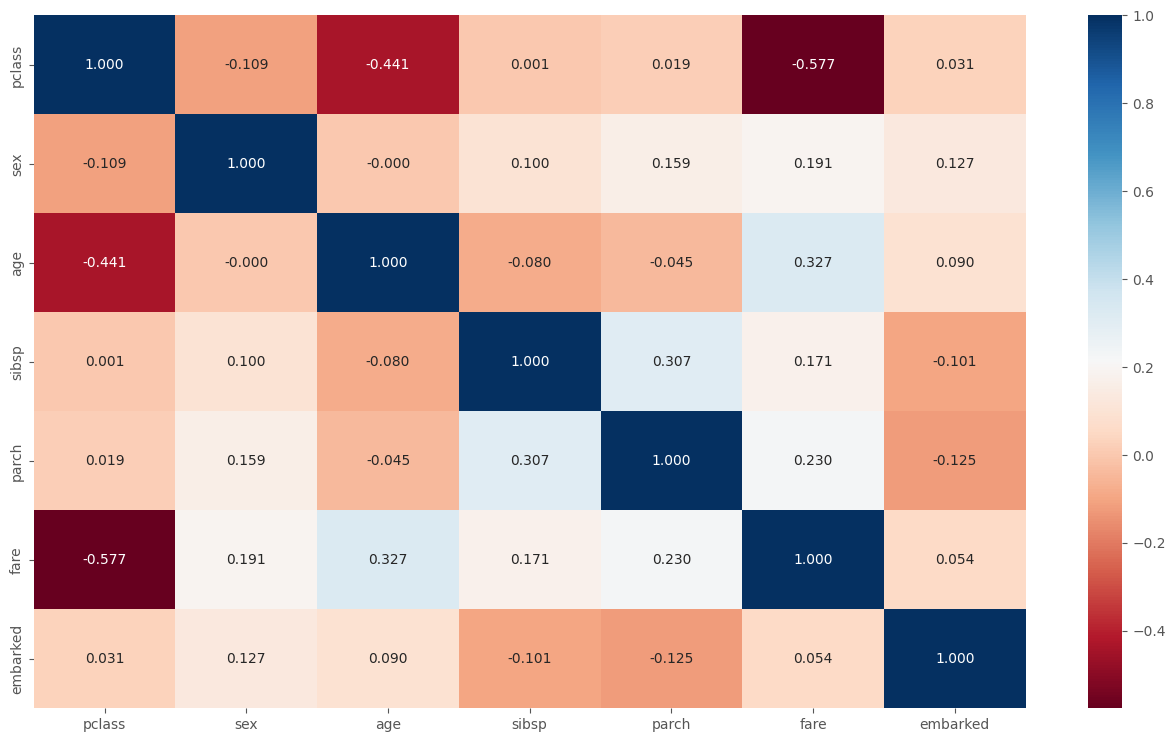

In [353]:
corr = titanic_tst.corr()
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".3f")
corr[['age']].sort_values(by = 'age',ascending = False)

In [354]:
variables_eliminar_t = ['sibsp'	,'parch']               
titanic_tst = titanic_tst.drop(variables_eliminar_t, axis=1)
titanictst_imp = titanictst_imp.drop(variables_eliminar_t, axis=1)

In [355]:
titanic_tst.head(3)

,pclass,sex,age,fare,embarked
0,3,0.0,0.452723,0.015282,2.0
1,3,1.0,0.617566,0.013663,0.0
2,2,0.0,0.815377,0.018909,2.0


In [356]:
titanictst_imp.head(3)

,pclass,age,fare,sex_male,embarked_Q,embarked_S
0,3,0.452723,0.015282,1,1,0
1,3,0.617566,0.013663,0,0,1
2,2,0.815377,0.018909,1,1,0


# APRENDIZAJE NO SUPERVISADO

## Clustering

In [357]:
XX_test = titanic_tst
y = titanic_trn.loc[:,'survived']
X = titanic_trn.drop('survived', axis = 1)


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [358]:
k_range = range(1,15)
kmeans = [KMeans(n_clusters=i) for i in k_range]
scores = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
print(scores)

[-1217.228459182298, -682.5254511657508, -444.18873732377176, -333.3344715199206, -274.40462261694137, -208.76712155870942, -168.60633432255048, -133.2624050539834, -101.90043102224215, -79.40922132781147, -58.69724026058394, -43.515883724217595, -34.18022950354077, -29.67009910987933]


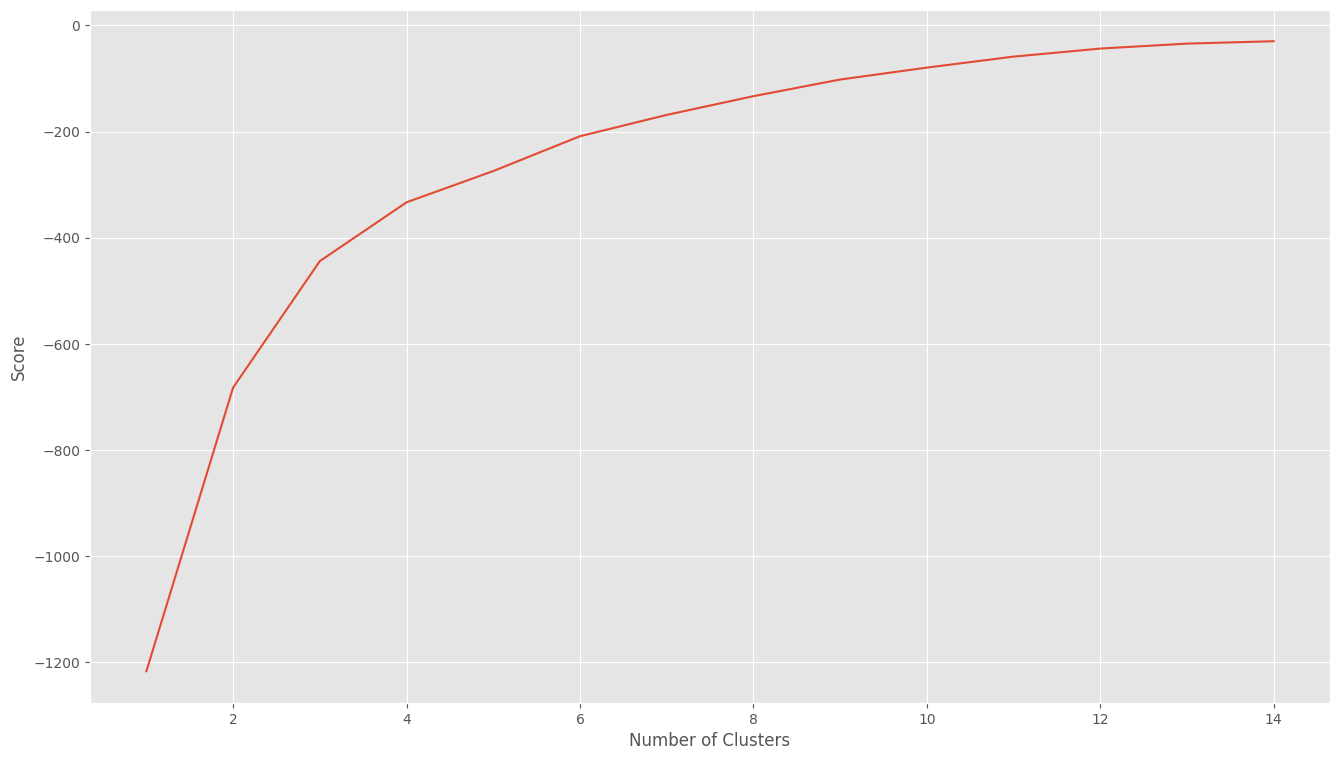

In [359]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.plot(k_range,scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show()

Text(0, 0.5, 'Distorsion')

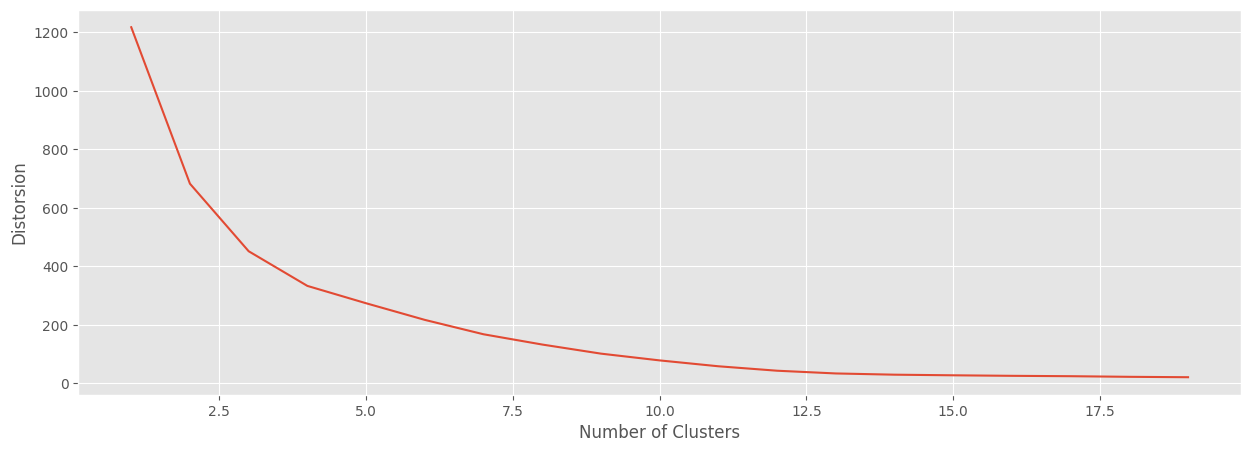

In [360]:
distorsion_score = []
for k in range(1, 20):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    distorsion_score.append(k_means.inertia_)
fig = plt.figure(figsize=(15, 5))
plt.plot(range(1, 20), distorsion_score)
plt.xlabel('Number of Clusters')
plt.ylabel('Distorsion')


se observa que el codo varia entre 2 y 5 , asi que cualquiera de los valores dentro de este rango sera adecuado para k

In [361]:
n_cluster=2
kmeans = KMeans(n_clusters=n_cluster, random_state= 1).fit(X)
centroides = kmeans.cluster_centers_
print(centroides)
labels = kmeans.predict(X)

[[3.         0.29327902 0.32650488 0.0266929  0.42769857]
 [1.46       0.425      0.41875829 0.10725162 0.28      ]]


In [362]:
y_pred = kmeans.predict(X)
print(y_pred)

[0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 1 1 0 0
 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0
 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 1
 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 1
 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1
 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1
 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1
 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0
 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 0 0 1
 0 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 1 

In [363]:
pred = pd.DataFrame({'Actual': y,'Predicción': labels})
print(pred)

     Actual  Predicción
0         0           0
1         1           1
2         1           0
3         1           1
4         0           0
..      ...         ...
886       0           1
887       1           1
888       0           0
889       1           1
890       0           0

[891 rows x 2 columns]


In [364]:
accuracy = accuracy_score(y, y_pred)
print("Precisión:", accuracy)

Precisión: 0.6677890011223344


<Axes: title={'center': 'Predicción'}, xlabel='age', ylabel='fare'>

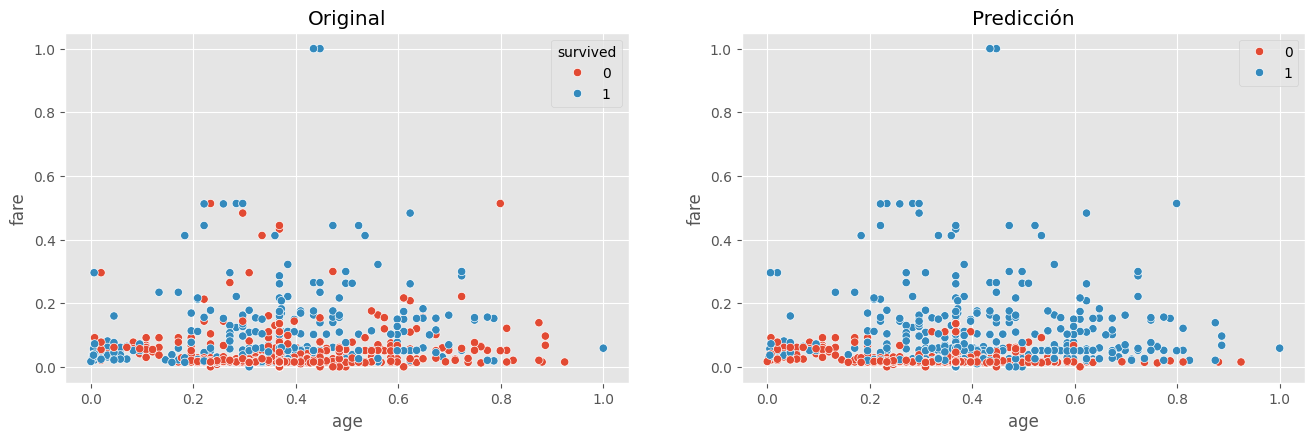

In [365]:
f = plt.figure(figsize=(16,10))
plt.subplot(221)
sns.scatterplot(x="age", y="fare", data=X, hue=y)
plt.title('Original')

plt.subplot(222)
plt.title('Predicción')
sns.scatterplot(x="age", y="fare", data=X, hue=y_pred)

 Si es posible, explorar el modelo con distintos valores de los parámetros para determinar cuáles podrían ser los valores óptimos. Puede utilizar algún algoritmo o alguna función de python para ello.

In [366]:
param_grid = {
    'n_clusters': [2, 3, 4, 5],
    'max_iter': [100, 200, 300],
    'init': ['k-means++', 'random'],
}
best_model = []
grid_search = GridSearchCV(KMeans(), param_grid, cv=5)
grid_search.fit(X)
z = grid_search.best_estimator_
par = ','.join(best_model)

print("Mejores parámetros para nuestro modelo K-means:", z)

Mejores parámetros para nuestro modelo K-means: KMeans(init='random', n_clusters=5)


In [367]:
y_predTst = kmeans.predict(XX_test)
print(y_predTst)
y_predTst.shape

[0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1
 1 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1
 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 0
 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1
 1 1 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 0
 1 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0
 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 0
 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 1 0 0 0 1 1
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1
 1 0 0 0 1 0 0 1 0 0 0]


(418,)

# APRENDIZAJE SUPERVISADO

In [368]:

def algortimo (model):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    model.fit(X_train, y_train)
    
    Y_pred = model.predict(X_test)
    print('Prediccion del conjunto de entrenamiento')
    print(Y_pred)
    
    score = model.score(X_train,y_train)
    print(f"Métrica del {model} para el conjunto de entrenamiento", score,'\n')
    kf = KFold(n_splits=5)
    cv = cross_val_score(estimator = model, X = X_train, y = y_train, cv = kf,scoring="accuracy" ) 
    cvm = cv.mean()
    std = cv.std()
    print(f"Promedio Validación cruzada de {model}: ", cvm,'\n')
    print(f'Varianza de {model}: ',std)
    print('\n Predicción del conjunto de test') 
    Yy_pred = model.predict(XX_test)
    print(Yy_pred)
    print(Yy_pred.shape)
    return score, cvm, std
   
   


In [369]:
print('X_train: {}'.format(X_train.shape))
print('y_train: {}'.format(y_train.shape))
print('X_test: {}'.format(X_test.shape))
print('y_test: {}'.format(y_test.shape))
print('XX_test: {}'.format(XX_test.shape))

X_train: (668, 5)
y_train: (668,)
X_test: (223, 5)
y_test: (223,)
XX_test: (418, 5)


## Clasificador bayesiano

In [370]:
gnb = GaussianNB()
score, cvm, std = algortimo(gnb)
print(gnb)
score_nb = score
cvm_nb = cvm
std_nb = std

Prediccion del conjunto de entrenamiento
[0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 0
 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 0 1 0
 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1
 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1]
Métrica del GaussianNB() para el conjunto de entrenamiento 0.7829341317365269 

Promedio Validación cruzada de GaussianNB():  0.779979800246886 

Varianza de GaussianNB():  0.01554225965451735

 Predicción del conjunto de test
[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 1 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 

## Clasificador Árbol de decisión

In [371]:
arbol = DecisionTreeClassifier()
score, cvm, std = algortimo(arbol)
score_arbol = score
cvm_arbol = cvm
std_arbol = std

Prediccion del conjunto de entrenamiento
[0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 1 1 0
 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0
 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0
 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1
 1]
Métrica del DecisionTreeClassifier() para el conjunto de entrenamiento 0.9775449101796407 

Promedio Validación cruzada de DecisionTreeClassifier():  0.7634608910335541 

Varianza de DecisionTreeClassifier():  0.02903447715867543

 Predicción del conjunto de test
[0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0
 0 0 1 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 1 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0
 0 1 1 1 1 0 1 1

## Clasificador $k$-NN

Obtener el mejor valor de $k$:

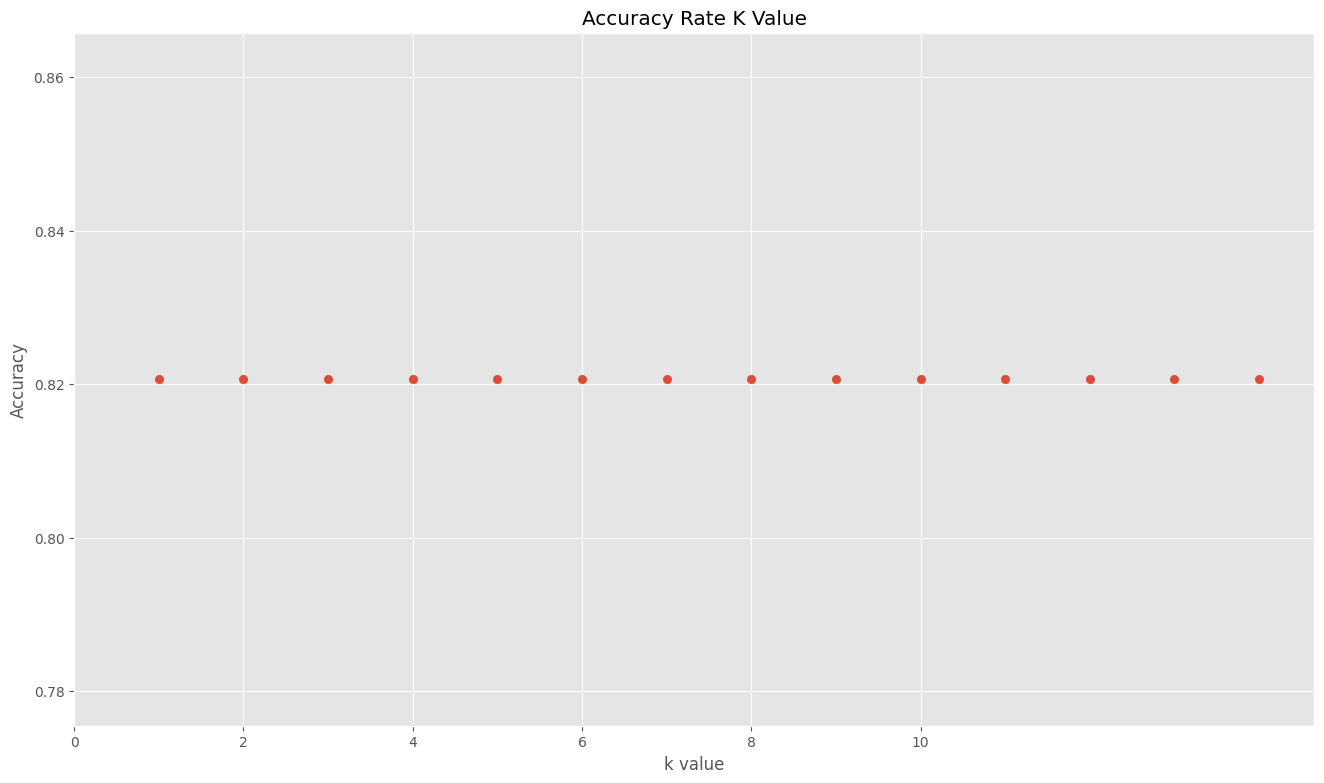

In [372]:

k_range = range(1,15)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = 3)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
plt.figure()
plt.title('Accuracy Rate K Value')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.scatter(k_range,scores)
plt.xticks([0,2,4,6,8,10])
plt.show()

In [373]:
n_neighbors = 3
k = KNeighborsClassifier( n_neighbors)
score, cvm, std = algortimo(k)
score_k = score
cvm_k = cvm
std_k = std


Prediccion del conjunto de entrenamiento
[1 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 0
 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0
 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1
 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0
 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1
 1]
Métrica del KNeighborsClassifier(n_neighbors=3) para el conjunto de entrenamiento 0.8817365269461078 

Promedio Validación cruzada de KNeighborsClassifier(n_neighbors=3):  0.8053866008304343 

Varianza de KNeighborsClassifier(n_neighbors=3):  0.01768390535452409

 Predicción del conjunto de test
[0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 1 0
 1 0 1 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0

## Clasificador Perceptrón Multicapa

In [374]:
mpl = MLPClassifier ()
score, cvm, std = algortimo(mpl)
score_mlp = score
cvm_mlp = cvm
std_mlp = std


Prediccion del conjunto de entrenamiento
[0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0
 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1
 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1
 1]
Métrica del MLPClassifier() para el conjunto de entrenamiento 0.812874251497006 

Promedio Validación cruzada de MLPClassifier():  0.7933789698125912 

Varianza de MLPClassifier():  0.021759405903239114

 Predicción del conjunto de test
[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 

# SVM o Máquinas de Vectores de Soporte 

In [375]:
svm = SVC()
score, cvm, std = algortimo(svm)
score_svm = score
cvm_svm = cvm
std_svm = std

Prediccion del conjunto de entrenamiento
[0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1
 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1
 0]
Métrica del SVC() para el conjunto de entrenamiento 0.811377245508982 

Promedio Validación cruzada de SVC():  0.7963864886095837 

Varianza de SVC():  0.010317448544665798

 Predicción del conjunto de test
[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 

#  Regrsión Lógica

In [376]:
lr = LogisticRegression()
score, cvm, std = algortimo(lr)
score_lr = score
cvm_lr = cvm
std_lr = std

Prediccion del conjunto de entrenamiento
[0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0
 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1
 1]
Métrica del LogisticRegression() para el conjunto de entrenamiento 0.7889221556886228 

Promedio Validación cruzada de LogisticRegression():  0.7844798563573111 

Varianza de LogisticRegression():  0.015323961582862766

 Predicción del conjunto de test
[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 

In [377]:
score = [score_nb,score_arbol, score_k, score_mlp,score_svm,score_lr]
meanValidaCruz = [cvm_nb, cvm_arbol, cvm_k, cvm_mlp, cvm_svm, cvm_lr]
stdValidaCruz = [std_nb, std_arbol, std_k, std_mlp, std_svm, std_lr]
labels = ['Naive Bayes','Árbol de decisión', 'K-NN','Perceptrón Multicapa', 'SVM', 'Regresión Lógica']

Modelos = pd.DataFrame({'Modelos': labels,
                            'Validación Cruzada.': meanValidaCruz,
                            'Varianza': stdValidaCruz,
                            'Puntuación': score})
Modelos.sort_values(by = 'Validación Cruzada.', ascending = False).style.background_gradient(cmap='coolwarm').set_table_styles([{
    'selector': 'thead tr th',
    'props': [('font-family', 'Lucida Calligraphy'), ('color', 'LightGreen'), ('font-size', '15px')]
}])

,Modelos,Validación Cruzada.,Varianza,Puntuación
2,K-NN,0.805387,0.017684,0.881737
4,SVM,0.796386,0.010317,0.811377
3,Perceptrón Multicapa,0.793379,0.021759,0.812874
5,Regresión Lógica,0.784480,0.015324,0.788922
0,Naive Bayes,0.779980,0.015542,0.782934
1,Árbol de decisión,0.763461,0.029034,0.977545


Teniendo en cuenta los resultados obtenidos , se observa que K-NN y SVM tiene las mejores putuaciones en cuanto a precisión se procederá a mejorar estos modelos. De igual manera se tratará de mejorar la puntuación del árbol de decisiones.

 ## Mejorando los resultados

Mejorando SVM

In [378]:
parametros_svm = [
    {'C': [0.1, 1, 10, 100], 'kernel': ['linear']},
    {'C': [0.1, 1, 10, 100], 'kernel': ['rbf'], 'gamma': [0.1, 0.01, 0.001]},
]
grid_search_svm = GridSearchCV(estimator=svm,
                                param_grid=parametros_svm,
                                scoring='accuracy',
                                cv=10)

grid_search_svm = grid_search_svm.fit(X_train, y_train)

mejores = grid_search_svm.best_params_
print("Mejores parámetros:", mejores,"\n")
mejor_svm = SVC(**grid_search_svm.best_params_)
mejor_svm.fit(X_train, y_train)

score_svm_gs = mejor_svm.score(X_test, y_test)
print('Precisión del algoritmo SVM después de GridSearchCV: ', score_svm_gs,"\n")

# Validación cruzada con los mejores parámetros
cv_svm_gs = cross_val_score(estimator=mejor_svm, X=X_train, y=y_train, cv=10)
cvm_svm_gs = cv_svm_gs.mean()
std_svm_gs = cv_svm_gs.std()
print("Promedio Validación cruzada SVM después de GridSearchCV: ", cvm_svm_gs, "\n")
print('Varianza de SVM después de GridSearchCV: ', std_svm_gs)

     

Mejores parámetros: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'} 

Precisión del algoritmo SVM después de GridSearchCV:  0.8116591928251121 

Promedio Validación cruzada SVM después de GridSearchCV:  0.8113975576662144 

Varianza de SVM después de GridSearchCV:  0.03340003525683969


In [379]:
Yy_pred = mejor_svm.predict(XX_test)
print(Yy_pred)
print(Yy_pred.shape)

[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 0 1 0 0 0 1 0 0 0]
(418,)


Mejorando K-NN

In [380]:
parametros_knn = {
    'n_neighbors': [2, 3,4, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(estimator=k,
                                param_grid=parametros_knn,
                                scoring='accuracy',
                                cv=10)


grid_search_knn = grid_search_knn.fit(X_train, y_train)

mejores = grid_search_knn.best_params_
print("Mejores parámetros:", mejores,"\n")
mejor_knn = KNeighborsClassifier(**grid_search_knn.best_params_)
mejor_knn.fit(X_train, y_train)

score_k_gs = mejor_knn.score(X_test, y_test)
print('Precisión del algoritmo K-NN después de GridSearchCV: ', score_k_gs,"\n")

# Validación cruzada con los mejores parámetros
k_gs = cross_val_score(estimator=mejor_knn, X=X_train, y=y_train, cv=10)
cvm_k_gs = k_gs.mean()
std_k_gs = k_gs.std()
print("Promedio Validación cruzada K-NN después de GridSearchCV: ", cvm_k_gs,"\n")
print('Varianza de K-NN después de GridSearchCV: ', std_k_gs)


Mejores parámetros: {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'} 

Precisión del algoritmo K-NN después de GridSearchCV:  0.8116591928251121 

Promedio Validación cruzada K-NN después de GridSearchCV:  0.8188602442333786 

Varianza de K-NN después de GridSearchCV:  0.03918904791707789


In [381]:
Yy_pred = mejor_knn.predict(XX_test)
print(Yy_pred)
print(Yy_pred.shape)

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0]
(418,)


Mejorando Árbol de Decisiones

In [382]:
minSplit = np.arange(20, 26, 1)
maxDepth = np.arange(3, 10, 1) 
parametros = [
    {'criterion': ['gini'], 'max_depth': [3, 4, 5, 6, 7, 8, 9], 'min_samples_split': minSplit},
    {'criterion': ['entropy'], 'max_depth': [3, 4, 5, 6, 7, 8, 9], 'min_samples_split': minSplit}
]

gridSearch = GridSearchCV(estimator=arbol, param_grid=parametros, scoring='accuracy', cv=10)
gridSearch = gridSearch.fit(X_train, y_train)

mejor_arbol = gridSearch.best_estimator_
mejores = gridSearch.best_params_
print("Mejores parámetros:", mejores,"\n")

y_pred_test = mejor_arbol.predict(X_test)

score_arbol_gs = mejor_knn.score(X_test, y_test)
print('Precisión del algoritmo Árbol de decisiones después de GridSearchCV: ', score_arbol_gs,"\n")

k_gs = cross_val_score(estimator=mejor_arbol, X=X_train, y=y_train, cv=10)
cvm_arbol_gs = k_gs.mean()
std_arbol_gs = k_gs.std()
print("Promedio Validación cruzada Árbol de decisiones después de GridSearchCV: ", cvm_arbol_gs,"\n")
print('Varianza del Árbol de decisiones después de GridSearchCV: ', std_arbol_gs)


Mejores parámetros: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 20} 

Precisión del algoritmo Árbol de decisiones después de GridSearchCV:  0.8116591928251121 

Promedio Validación cruzada Árbol de decisiones después de GridSearchCV:  0.8234735413839891 

Varianza del Árbol de decisiones después de GridSearchCV:  0.029888960367610715


In [383]:
yx_pred_test = mejor_arbol.predict(XX_test)
print(yx_pred_test)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [384]:
score = [score_arbol,score_arbol_gs, score_k,score_k_gs, score_svm,score_svm_gs]
meanValidaCruz = [ cvm_arbol,cvm_arbol_gs, cvm_k,cvm_k_gs, cvm_svm, cvm_svm_gs]
stdValidaCruz = [ std_arbol,std_arbol_gs, std_k,std_k_gs,std_svm, std_svm_gs]
labels = ['Árbol de decisión','Árbol de decisión mejorado', 'K-NN','K-NN mejorado','SVM', 'SVM mejorado',]

Modelos = pd.DataFrame({'Modelos': labels,
                            'Validación Cruzada.': meanValidaCruz,
                            'Varianza': stdValidaCruz,
                            'Puntuación': score})
Modelos.style.background_gradient(cmap='coolwarm').set_table_styles([{
    'selector': 'thead tr th',
    'props': [('font-family', 'Lucida Calligraphy'), ('color', 'LightGreen'), ('font-size', '15px')]
}])

,Modelos,Validación Cruzada.,Varianza,Puntuación
0,Árbol de decisión,0.763461,0.029034,0.977545
1,Árbol de decisión mejorado,0.823474,0.029889,0.811659
2,K-NN,0.805387,0.017684,0.881737
3,K-NN mejorado,0.818860,0.039189,0.811659
4,SVM,0.796386,0.010317,0.811377
5,SVM mejorado,0.811398,0.033400,0.811659


# Conclusiones

Incluir en este apartado las conclusiones que se pueden obtener a partir del análisis comparativo de los modelos de clasificación.


Comparando los modelos iniciales, que incluyen K-NN, SVM, Perceptrón Multicapa, Regresión Logística, Naive Bayes y Árbol de Decisión, se observa que en la primera evaluación, el algoritmo K-NN presenta la mejor puntuación de validación cruzada con una baja varianza, destacándose como el de mejor rendimiento en este caso. Le siguen en rendimiento el SVM y el Perceptrón Multicapa.

Posteriormente, se procede a mejorar las puntuaciones de los dos algoritmos mejor posicionados, así como del último de todos estos, ajustando sus parámetros. Al realizar la comparación después de estas mejoras, se destaca que el modelo de Árbol de Decisión ha experimentado el mayor porcentaje de mejora. Su puntuación de validación cruzada resulta superior a la de los modelos anteriores.

En conclusión, tras las optimizaciones, el Árbol de Decisión emerge como el modelo con el mejor desempeño en términos de validación cruzada, superando a los demás algoritmos evaluados.